In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyannote.core import Annotation, Segment
from pyannote.core.notebook import Notebook
import pickle

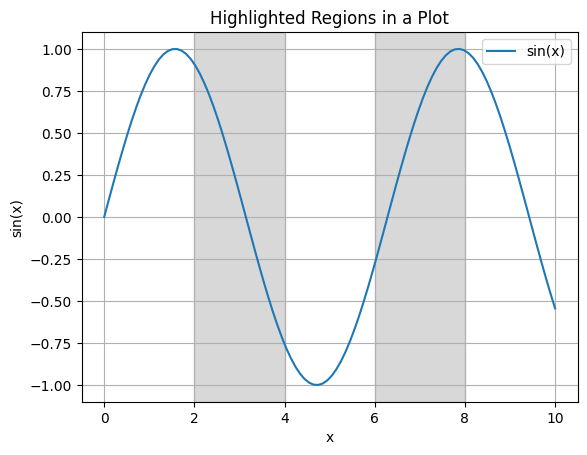

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot the data
plt.plot(x, y, label='sin(x)')

# Highlighting regions
highlight_regions = [(2, 4), (6, 8)]  # Example regions to highlight

for region in highlight_regions:
    plt.axvspan(region[0], region[1], color='gray', alpha=0.3)  # Add vertical shaded region

# Add labels, title, legend, etc.
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Highlighted Regions in a Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [2]:
def create_annotation_plot(
    diarization_output,
    video_duration,
    highlight_regions = None,#[{"region": (2, 4), "color": "gray"}, {"region": (6, 8), "color": "blue"}]
    start_time = -1,
    end_time = -1,
    plot_name="diarization",
    video_name = "temp",
):
    custom_diarization = Annotation()
    
    if start_time >= 0 and end_time >= 0:
        shorten_graph = True
        video_duration = end_time - start_time

    if not shorten_graph:
        for speaker_key in diarization_output.keys():
            for timeline in diarization_output[speaker_key]:
                custom_diarization[Segment(timeline[0], timeline[1])] = speaker_key
    else:
        for speaker_key in diarization_output.keys():
            for speaker_key in diarization_output.keys():
                for timeline in diarization_output[speaker_key]:
                    if timeline[0] >= start_time and timeline[1] <= end_time:
                        custom_diarization[Segment(timeline[0], timeline[1])] = speaker_key
                    elif timeline[0] < start_time and timeline[1] > end_time:
                        custom_diarization[Segment(start_time, end_time)] = speaker_key
                    elif timeline[0] < start_time and timeline[1] >= start_time:
                        custom_diarization[Segment(start_time, timeline[1])] = speaker_key
                    elif timeline[0] <= end_time and timeline[1] > end_time:
                        custom_diarization[Segment(timeline[0], end_time)] = speaker_key
                    

    # Create a figure
    fig, ax = plt.subplots(figsize=(15, 2))

    # Plot the custom diarization result
    nb = Notebook()
    nb.plot_annotation(custom_diarization, ax, legend=True)

    # Customize the plot
    ax.set_xlabel("Time")
    ax.set_yticks([])  # To hide the y-axis
    if shorten_graph:
        ax.set_xlim(start_time, end_time)
    else:
        ax.set_xlim(0, video_duration)
    if int(video_duration/20) == 0:
        tick_interval = 1
    else:
        tick_interval = int(video_duration / 20)
    
    if shorten_graph:
        ax.set_xticks(np.arange(start_time, end_time, tick_interval))
    else:
        ax.set_xticks(np.arange(0, int(video_duration), tick_interval))
#     ax.set_xlim(30, 40)
#     ax.set_xticks(np.arange(30, 40, 1))
    
    if highlight_regions is not None:
        for h_region in highlight_regions:
            plt.axvspan(h_region["region"][0], h_region["region"][1], color=h_region["color"], alpha=0.3)

    # Save the figure
    saveFileName = f"{video_name}.png"
    fig.savefig(saveFileName, bbox_inches="tight")
    # Close the figure
    ax.clear()
    plt.close(fig)

In [20]:
vdo_path = "../../output/run_output_final/final_diarization_output_MY_DATASET_ALL.pckl"
dia_output = pickle.load(open(vdo_path, "rb"))

In [5]:
dia_output["PiersMorgan_3_135_334"]["audio_12"]

{'SPEAKER_03': [(0.01, 14.58),
  (16.88, 24.27),
  (42.16, 60.87),
  (132.62, 135.51),
  (146.6, 147.56),
  (172.28, 176.83),
  (177.26, 181.25),
  (184.19, 190.08),
  (191.57, 191.94),
  (193.17, 199.09)],
 'SPEAKER_00': [(0.53, 0.81),
  (0.87, 2.4),
  (68.51, 68.97),
  (69.01, 92.05),
  (93.78, 94.24),
  (106.53, 106.77),
  (106.97, 108.01),
  (110.99, 111.37),
  (141.76, 141.81),
  (142.32, 144.35),
  (155.1, 174.52),
  (176.58, 177.0)],
 'SPEAKER_02': [(12.18, 21.16),
  (21.81, 45.42),
  (90.4, 90.77),
  (91.08, 91.98),
  (92.05, 140.72),
  (141.28, 141.76),
  (141.81, 142.32),
  (144.35, 144.39),
  (176.56, 176.58),
  (176.83, 176.88),
  (177.0, 185.7),
  (188.4, 193.4),
  (198.01, 198.06)],
 'SPEAKER_01': [(54.52, 68.94),
  (68.97, 69.01),
  (78.04, 78.43),
  (78.87, 78.97),
  (81.55, 85.41),
  (85.9, 86.41),
  (108.01, 109.86),
  (109.99, 110.99),
  (135.51, 157.41),
  (157.97, 159.23)]}

In [6]:
dia_output["PiersMorgan_3_135_334"]["video_simple"]

{'SPEAKER_00': [(55.72, 56.08),
  (57.96, 59.28),
  (61.72, 66.84),
  (68.56, 76.56),
  (78.72, 83.16),
  (84.52, 90.64),
  (108.76, 110.12),
  (139.84, 146.76),
  (148.72, 154.68),
  (155.16, 156.36),
  (157.36, 163.0),
  (164.32, 172.6),
  (176.64, 177.68)],
 'SPEAKER_01': [(12.96, 14.2),
  (17.32, 17.92),
  (19.6, 20.36),
  (27.0, 43.16),
  (57.96, 58.6),
  (93.76, 98.44),
  (100.24, 106.04),
  (108.48, 109.96),
  (110.56, 133.0),
  (133.6, 134.0),
  (176.88, 178.0),
  (180.16, 184.92),
  (189.4, 193.0)],
 'SPEAKER_02': [(0.0, 2.24),
  (3.36, 11.44),
  (14.6, 16.16),
  (17.96, 18.32),
  (22.64, 24.0),
  (46.44, 54.32),
  (56.12, 57.92),
  (134.04, 134.96),
  (186.2, 188.04),
  (193.96, 196.72)]}

In [7]:
from pydub import AudioSegment
audioFilePath = "../../output/video_temp/PiersMorgan_3_135_334/pywav/audio.wav"
video_duration = len(AudioSegment.from_file(audioFilePath)) / 1000
video_duration

199.018

In [43]:
highlight_regions = [{"region": (30.8, 33.6), "color": "green"},
                     {"region": (37.58, 41.12), "color": "blue"},
                    ]

In [44]:
create_annotation_plot(diarization_output=dia_output["zzzNDT_India_19_88"]["video_simple"],
                       video_duration=video_duration,
                       highlight_regions=highlight_regions,
                       video_name="temp_video"
                      )

In [45]:
create_annotation_plot(diarization_output=dia_output["zzzNDT_India_19_88"]["audio_12"],
                       video_duration=video_duration,
                       highlight_regions=highlight_regions,
                      video_name="temp_audio"
                      )

In [21]:
df_whisper = pd.read_excel("SpeakerAnalysis.xlsx", sheet_name="Sheet1")
df_gt = pd.read_excel("SpeakerAnalysis.xlsx", sheet_name="Sheet2")

In [22]:
st_lst = df_whisper["Start_time"]
et_lst = df_whisper["End_time"]
sp_lst = df_whisper["Speaker"]

whisper_dia = {}
for i in range(len(st_lst)):
    if sp_lst[i] in whisper_dia.keys():
        whisper_dia[sp_lst[i]].append((st_lst[i], et_lst[i]))
    else:
        whisper_dia[sp_lst[i]] = [(st_lst[i], et_lst[i])]

In [23]:
st_lst = df_gt["Start_time"]
et_lst = df_gt["End_time"]
sp_lst = df_gt["Speaker"]

gt_dia = {}
for i in range(len(st_lst)):
    if sp_lst[i] in gt_dia.keys():
        gt_dia[sp_lst[i]].append((st_lst[i], et_lst[i]))
    else:
        gt_dia[sp_lst[i]] = [(st_lst[i], et_lst[i])]

In [24]:
vdo_dia = dia_output["PiersMorgan_3_135_334"]["video_simple"]
ado_dia = dia_output["PiersMorgan_3_135_334"]["audio_12"]

In [25]:
vdo_dia["Host"] = vdo_dia.pop("SPEAKER_02")
vdo_dia["Guest 1"] = vdo_dia.pop("SPEAKER_01")
ado_dia["Host"] = ado_dia.pop("SPEAKER_03")
ado_dia["Guest 1"] = ado_dia.pop("SPEAKER_02")
gt_dia["Host"] = gt_dia.pop("Piers")
gt_dia["Noise from Host"] = gt_dia.pop("Noise from Piers")
gt_dia["Guest 1"] = gt_dia.pop("Left Guest")
gt_dia["Guest 2"] = gt_dia.pop("Middle Guest")
whisper_dia["Host"] = whisper_dia.pop("Piers")
whisper_dia["Guest 1"] = whisper_dia.pop("Left Guest")

In [26]:
create_annotation_plot(
    diarization_output=dia_output["PiersMorgan_3_135_334"]["video_simple"],
    video_duration=video_duration,
    start_time=10,
    end_time=24,    
    video_name="result_video",
)
create_annotation_plot(
    diarization_output=dia_output["PiersMorgan_3_135_334"]["audio_12"],
    video_duration=video_duration,
    start_time=10,
    end_time=24,    
    video_name="result_audio",
)
create_annotation_plot(
    diarization_output=whisper_dia,
    video_duration=video_duration,
    start_time=10,
    end_time=24,    
    video_name="result_whisper",
)
create_annotation_plot(
    diarization_output=gt_dia,
    video_duration=video_duration,
    start_time=10,
    end_time=24,    
    video_name="result_gt",
)

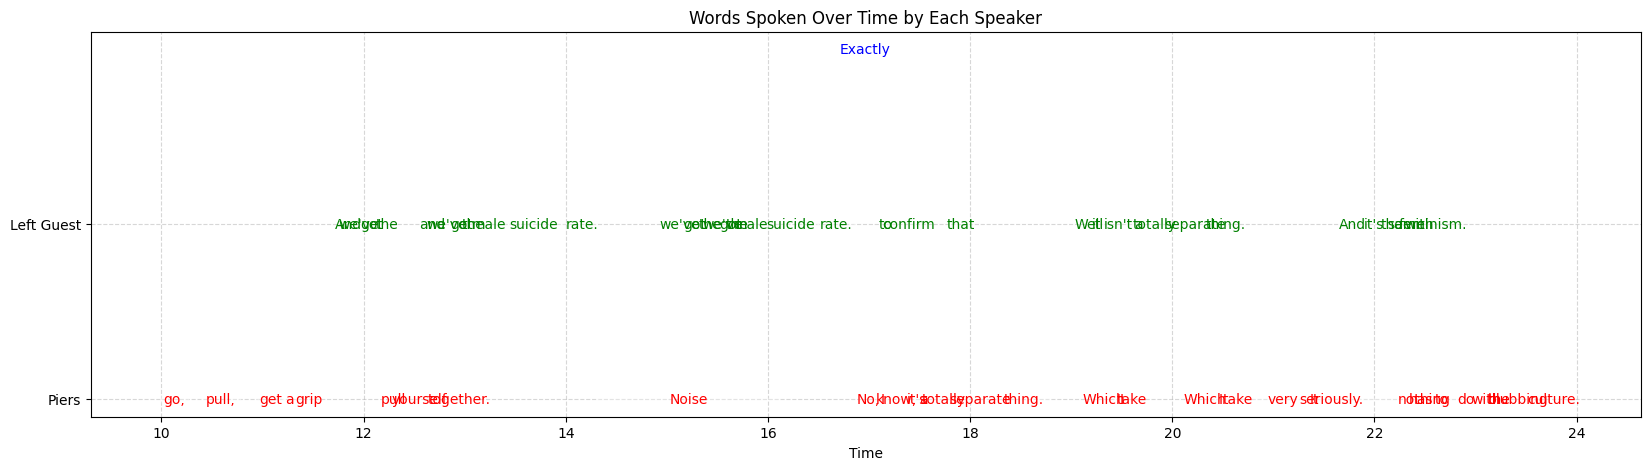

In [48]:
import matplotlib.pyplot as plt

# Sample data
# data = [
#     ("go,", 10, 10.26, "Piers"),
#     ("pull,", 10.4, 10.78, "Piers"),
#     ("get", 10.96, 11.2, "Piers"),
#     ("a", 11.2, 11.34, "Piers"),
#     ("grip", 11.34, 11.58, "Piers"),
#     ("And", 11.8, 11.9, "Left Guest"),
#     ("we've", 11.91, 12, "Left Guest"),
#     ("got", 12, 12.16, "Left Guest"),
#     ("the", 12.16, 12.3, "Left Guest"),
#     ("and", 12.6, 12.75, "Left Guest")
# ]
data = df_gt.values.tolist()

# Define colors for each speaker
speaker_colors = {
    "Piers": "red",
    "Left Guest": "green",
    "Middle Guest": "blue"
}

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(20, 5))

# Plot the words on the timeline
for word, start, end, speaker in data:
    color = speaker_colors.get(speaker, 'black')  # Default to black if speaker not in dict
    ax.plot([start, end], [speaker, speaker], marker='|', color="white", alpha=0.3)
    ax.text((start + end) / 2, speaker, word, ha='center', va='center', fontsize=10, color=color)

# Set labels and title
ax.set_xlabel('Time')
ax.set_yticks(['Piers', 'Left Guest'])
ax.set_yticklabels(['Piers', 'Left Guest'])
ax.set_title('Words Spoken Over Time by Each Speaker')

# Show grid
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


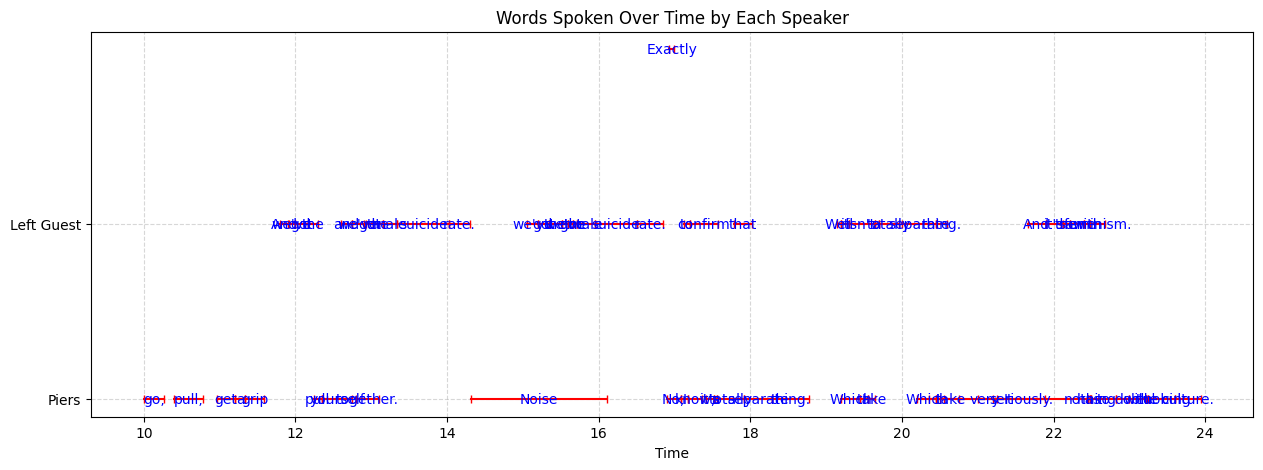

In [43]:
import matplotlib.pyplot as plt

# Sample data
# data = [
#     ("go,", 10, 10.26, "Piers"),
#     ("pull,", 10.4, 10.78, "Piers"),
#     ("get", 10.96, 11.2, "Piers"),
#     ("a", 11.2, 11.34, "Piers"),
#     ("grip", 11.34, 11.58, "Piers"),
#     ("And", 11.8, 11.9, "Left Guest"),
#     ("we've", 11.91, 12, "Left Guest"),
#     ("got", 12, 12.16, "Left Guest"),
#     ("the", 12.16, 12.3, "Left Guest"),
#     ("and", 12.6, 12.75, "Left Guest")
# ]
data = df_gt.values.tolist()

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the words on the timeline
for word, start, end, speaker in data:
    ax.plot([start, end], [speaker, speaker], marker='|', color='red')  # Fixed line color
    ax.text((start + end) / 2, speaker, word, ha='center', va='center', fontsize=10, color='blue')

# Set labels and title
ax.set_xlabel('Time')
ax.set_yticks(['Piers', 'Left Guest'])
ax.set_yticklabels(['Piers', 'Left Guest'])
ax.set_title('Words Spoken Over Time by Each Speaker')

# Show grid
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


In [5]:
import pandas as pd

In [6]:
df = pd.read_excel("../../../del_later/FinalFaceClusteringResults.xlsx", sheet_name="Sheet2")

In [7]:
df

,Filename,Video Type,Confusion,Confusion_wo_Track,Correct,Correct_wo_Track,Confusion %,Confusion_wo_track %
0,StarTalk_Cosmic_780_850,Online,0,0,1356,1356,0.00,0.00
1,StarTalk_Mars_1680_1780,Online,0,1,2290,2289,0.00,0.04
2,StarTalk_Mars_1109_1175,Online,0,2,1445,1443,0.00,0.14
3,StarTalk_CMBR_270_308,Online,0,0,680,680,0.00,0.00
4,SkySports_1_255_535,Offline,14,19,4303,4298,0.32,0.44
...,...,...,...,...,...,...,...,...
71,TalkSport_1_131_310,Offline,0,6,4069,4063,0.00,0.15
72,StarTalk_Questions_831_5_924,Online,0,1,1659,1658,0.00,0.06
73,StarTalk_Consciousness_2254_2314,Online,0,0,1151,1151,0.00,0.00
74,StarTalk_Farming_2550_2645,Online,0,0,1316,1316,0.00,0.00


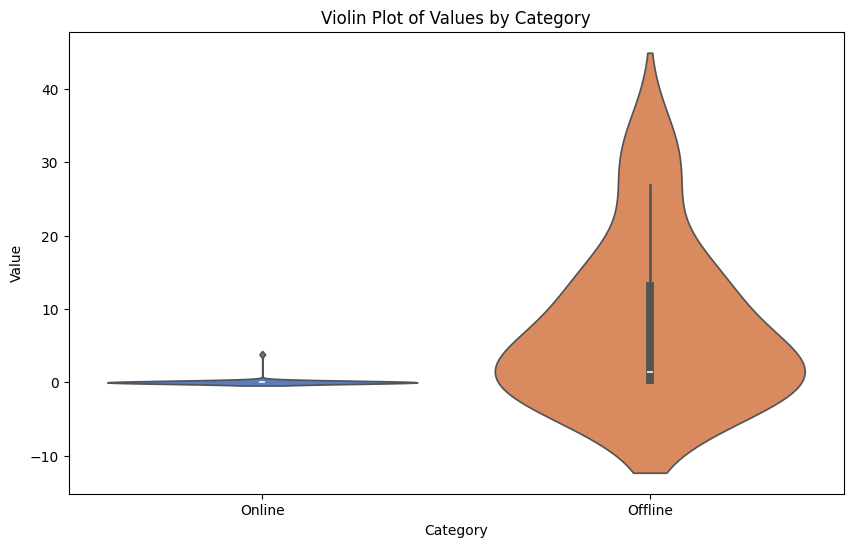

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Category': df["Video Type"],
    'Value': df["Confusion %"]
})

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Value', data=data, inner='box', palette='muted', hue='Category', legend=False)

# Adding title and labels
plt.title('Violin Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()


In [11]:
temp_df = pd.read_excel("../../Dataset/Dataset_stats.xlsx")
temp_df

,Video Name,Video Type,Video Length,Number of words,Off-screen words,Audio Error,Video Error,Combined Error,Video Missed Error,Video Incorrect,Change,Overlap %,Face Clusterng error,Word overlap %
0,ESPN_1,Offline,212.161,595,322,0.289076,0.645378,0.290756,0.541176,0.104202,-0.001681,0.097038,0.1334,0.183193
1,MagnusCarlson_542_599,Offline,57.051,158,8,0.145570,0.050633,0.012658,0.050633,0.000000,0.132911,0.007744,0.0168,0.025316
2,NDT_India_19_88,Offline,69.056,220,72,0.031818,0.345455,0.063636,0.327273,0.018182,-0.031818,0.029656,0.0008,0.040909
3,PiersMorgan_1_0_165,Offline,165.001,608,158,0.157895,0.396382,0.208882,0.259868,0.136513,-0.050987,0.161957,0.1116,0.312500
4,PiersMorgan_1_165_368,Offline,203.012,750,225,0.233333,0.456000,0.233333,0.300000,0.156000,0.000000,0.282972,0.0049,0.517333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,StarTalk_Sleep_2470_2551,Online,81.014,248,39,0.137097,0.165323,0.250000,0.157258,0.008065,-0.112903,0.026709,0.0000,0.036290
72,StarTalk_Sleep_382_450,Online,68.104,166,16,0.186747,0.114458,0.024096,0.096386,0.018072,0.162651,0.095431,0.0000,0.120482
73,StarTalk_Sleep_748_796,Online,48.019,122,29,0.172131,0.254098,0.106557,0.237705,0.016393,0.065574,0.137620,0.0000,0.237705
74,TalkSport_1_0_131,Offline,131.007,412,114,0.019417,0.279126,0.002427,0.276699,0.002427,0.016990,0.004645,0.0033,0.014563


In [39]:
temp1 = temp_df[["Video Name", "Video Type", "Audio Error"]].copy()
temp1["Error"] = temp1["Audio Error"]
temp1["Category"] = "Audio Error"
temp1 = temp1[["Video Name", "Video Type", "Category", "Error"]]
temp2 = temp_df[["Video Name", "Video Type", "Combined Error"]].copy()
temp2["Error"] = temp2["Combined Error"]
temp2["Category"] = "Combined Error"
temp2 = temp2[["Video Name", "Video Type", "Category", "Error"]]
final_temp = pd.concat([temp1, temp2]).reset_index(drop=True)
final_temp

,Video Name,Video Type,Category,Error
0,ESPN_1,Offline,Audio Error,0.289076
1,MagnusCarlson_542_599,Offline,Audio Error,0.145570
2,NDT_India_19_88,Offline,Audio Error,0.031818
3,PiersMorgan_1_0_165,Offline,Audio Error,0.157895
4,PiersMorgan_1_165_368,Offline,Audio Error,0.233333
...,...,...,...,...
147,StarTalk_Sleep_2470_2551,Online,Combined Error,0.250000
148,StarTalk_Sleep_382_450,Online,Combined Error,0.024096
149,StarTalk_Sleep_748_796,Online,Combined Error,0.106557
150,TalkSport_1_0_131,Offline,Combined Error,0.002427


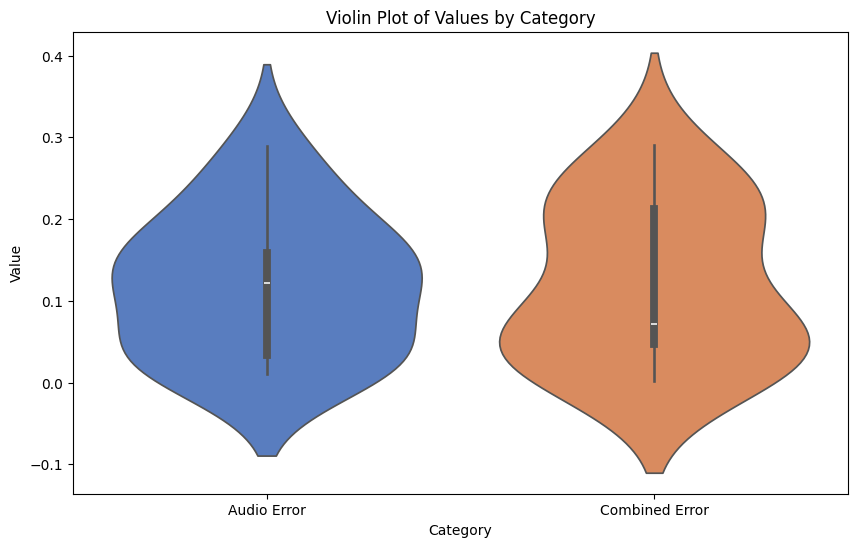

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Error', data=final_temp[final_temp["Video Type"] == "Offline"], inner='box', palette='muted', hue='Category', legend=False)

# Adding title and labels
plt.title('Violin Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Value')

# Show plot
plt.show()


In [41]:
import plotly.express as px
import pandas as pd

# Create the scatter plot
fig = px.scatter(final_temp, x="Category", y="Error", color='Video Type', title='Scatter Plot of Online vs Offline Categories')

# Show the plot
fig.show()

In [10]:
import plotly.express as px
import pandas as pd
import numpy as np

# Sample data
np.random.seed(10)
data = pd.DataFrame({
    'Category': np.repeat(['A', 'B', 'C', 'D'], 100),
    'Value': np.concatenate([np.random.normal(loc, 1, 100) for loc in [0, 1, 2, 3]])
})

# Create the violin plot
fig = px.violin(data, x='Category', y='Value', box=True, points='all', title='Violin Plot of Values by Category')

# Show the plot
fig.show()


In [18]:
import pandas as pd
import plotly.express as px

In [36]:
df4 = pd.read_excel("../../Dataset/Dataset_stats.xlsx", sheet_name="Sheet4")

In [37]:
df4

,Video Name,Video Type,Number of Speakers,Audio_pred,Video_pred,Combined_pred,Audio,Video,Unnamed: 8,Unnamed: 9,Unnamed: 10,Offline,Online,Total
0,ESPN_1,In-person,5,4,5,6,0,1,NaN,NaN,Audio-only,0.0,0.0,0.0
1,MagnusCarlson_542_599,In-person,2,2,2,2,1,1,NaN,NaN,Video-only,0.0,0.0,0.0
2,NDT_India_19_88,In-person,4,4,5,5,1,0,NaN,NaN,Total Videos,0.0,0.0,0.0
3,PiersMorgan_1_0_165,In-person,4,4,4,5,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,PiersMorgan_1_165_368,In-person,4,4,4,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,StarTalk_Sleep_2470_2551,Virtual,3,2,3,3,0,1,NaN,NaN,NaN,NaN,NaN,NaN
72,StarTalk_Sleep_382_450,Virtual,4,3,4,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN
73,StarTalk_Sleep_748_796,Virtual,4,3,4,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN
74,TalkSport_1_0_131,In-person,3,3,2,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
temp = df4[["Video Type", "Number of Speakers", "Audio_pred"]].groupby(["Video Type", "Number of Speakers"]).count().reset_index()

In [43]:
fig = px.histogram(df4, x="Number of Speakers", y="Audio_pred", nbins=5,
             color='Video Type', barmode='group',
             height=400)
fig.update_layout(yaxis_title='Frequency')
fig.show()

In [46]:
df1 = pd.read_excel("../../Dataset/Dataset_stats.xlsx", sheet_name="Sheet1")

In [49]:
fig = px.histogram(df1, x="Video Length", y="Number of words", nbins=10,
             color='Video Type', barmode='group',
             height=400)
fig.update_layout(yaxis_title='Frequency')
fig.show()

In [14]:
import numpy as np
import plotly.express as px

# Create a histogram
fig = px.histogram(df["Number of Speakers"], nbins=10, title='Histogram of Random Data')

# Show the plot
fig.show()